In [42]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

-1

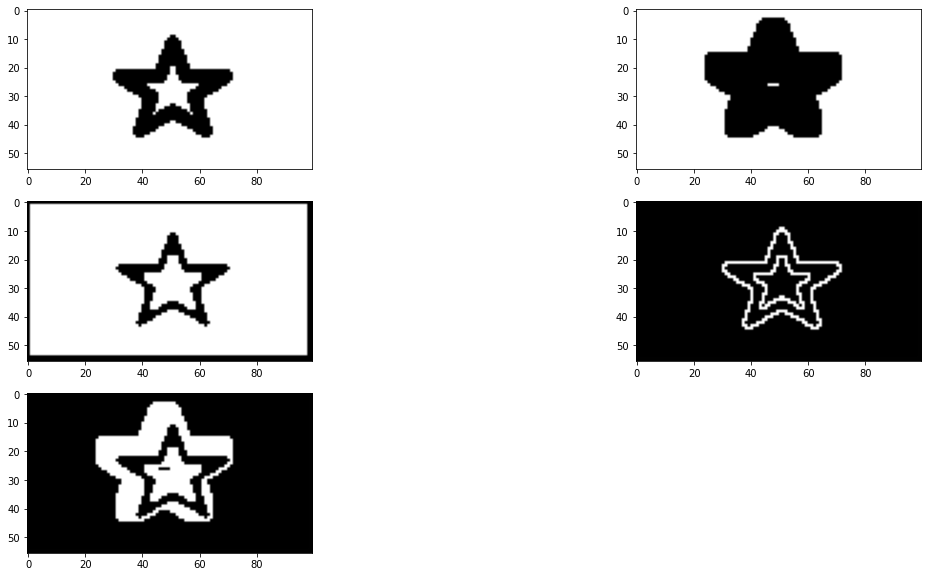

In [43]:
img = cv2.imread('estrella.bmp', 0) 
  

H,W=img.shape
img_dilation= np.zeros(img.shape,np.uint8)
img_erosion= np.zeros(img.shape,np.uint8)
for i in range(H):
    for j in range(W):
        valor=np.amin(img[i:i+7,j:j+7]) 
        img_dilation[i,j]=valor

dims=3
for i in range(H-dims):
    for j in range(W-dims):
        mask = img[i:i+dims,j:j+dims]
        values = (mask == 0)
        img_erosion[i+1][j+1] = 0 if np.all(values) else 255

new_image=np.subtract(img, img_erosion, dtype=np.uint8)
new_image=new_image*255

#Gradiente formologico
new_image_morfologico=np.subtract(img_dilation, img_erosion, dtype=np.uint8)
new_image_morfologico=new_image_morfologico*255

plt.figure(figsize=(20,10))
plt.subplot(3,2,1)
plt.imshow(img, cmap = "gray")
plt.subplot(3,2,2)
plt.imshow(img_dilation, cmap = "gray")
plt.subplot(3,2,3)
plt.imshow(img_erosion, cmap = "gray")
plt.subplot(3,2,4)
plt.imshow(new_image, cmap = "gray")
plt.subplot(3,2,5)
plt.imshow(new_image_morfologico, cmap = "gray")
#cv2.imshow('Input', img) 
#cv2.imshow('Erosion', img_dilation) 
cv2.waitKey(0)

0
255
255


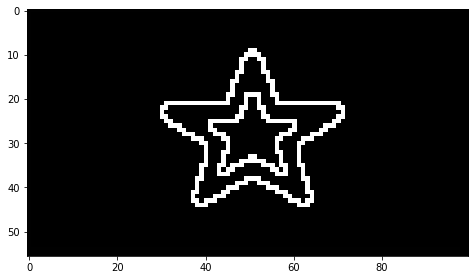

In [44]:
#new_image= np.zeros(img.shape,np.uint8)
#new_image=abs(img-img_erosion)
new_image=np.subtract(img, img_erosion, dtype=np.uint8)
new_image=new_image*255
print(img[30,39])
print(img_erosion[30,39])
print(new_image[30,39])
#print(img_erosion)
#print(new_image[50:80,30:50])

plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.imshow(new_image, cmap = "gray")

In [45]:
#Perimetro Contornos
ret,thresh = cv2.threshold(img,127,255,0)
contours,hierarchy = cv2.findContours(thresh, 1, 2)
cnt = contours[0]
M = cv2.moments(cnt)
print(M)

{'m00': 96.0, 'm10': 4848.0, 'm01': 2732.6666666666665, 'm20': 245808.0, 'm11': 137999.66666666666, 'm02': 78656.0, 'm30': 12512688.0, 'm21': 6997401.399999999, 'm12': 3972128.0, 'm03': 2288032.2, 'mu20': 984.0, 'mu11': 0.0, 'mu02': 869.88425925927, 'mu30': 0.0, 'mu21': 408.4000000000633, 'mu12': 1.4551915228366852e-10, 'mu03': -455.6830375515856, 'nu20': 0.10677083333333333, 'nu11': 0.0, 'nu02': 0.09438848299254232, 'nu30': 0.0, 'nu21': 0.004522802783893975, 'nu12': 1.6115436509754292e-15, 'nu03': -0.005046436118538822}


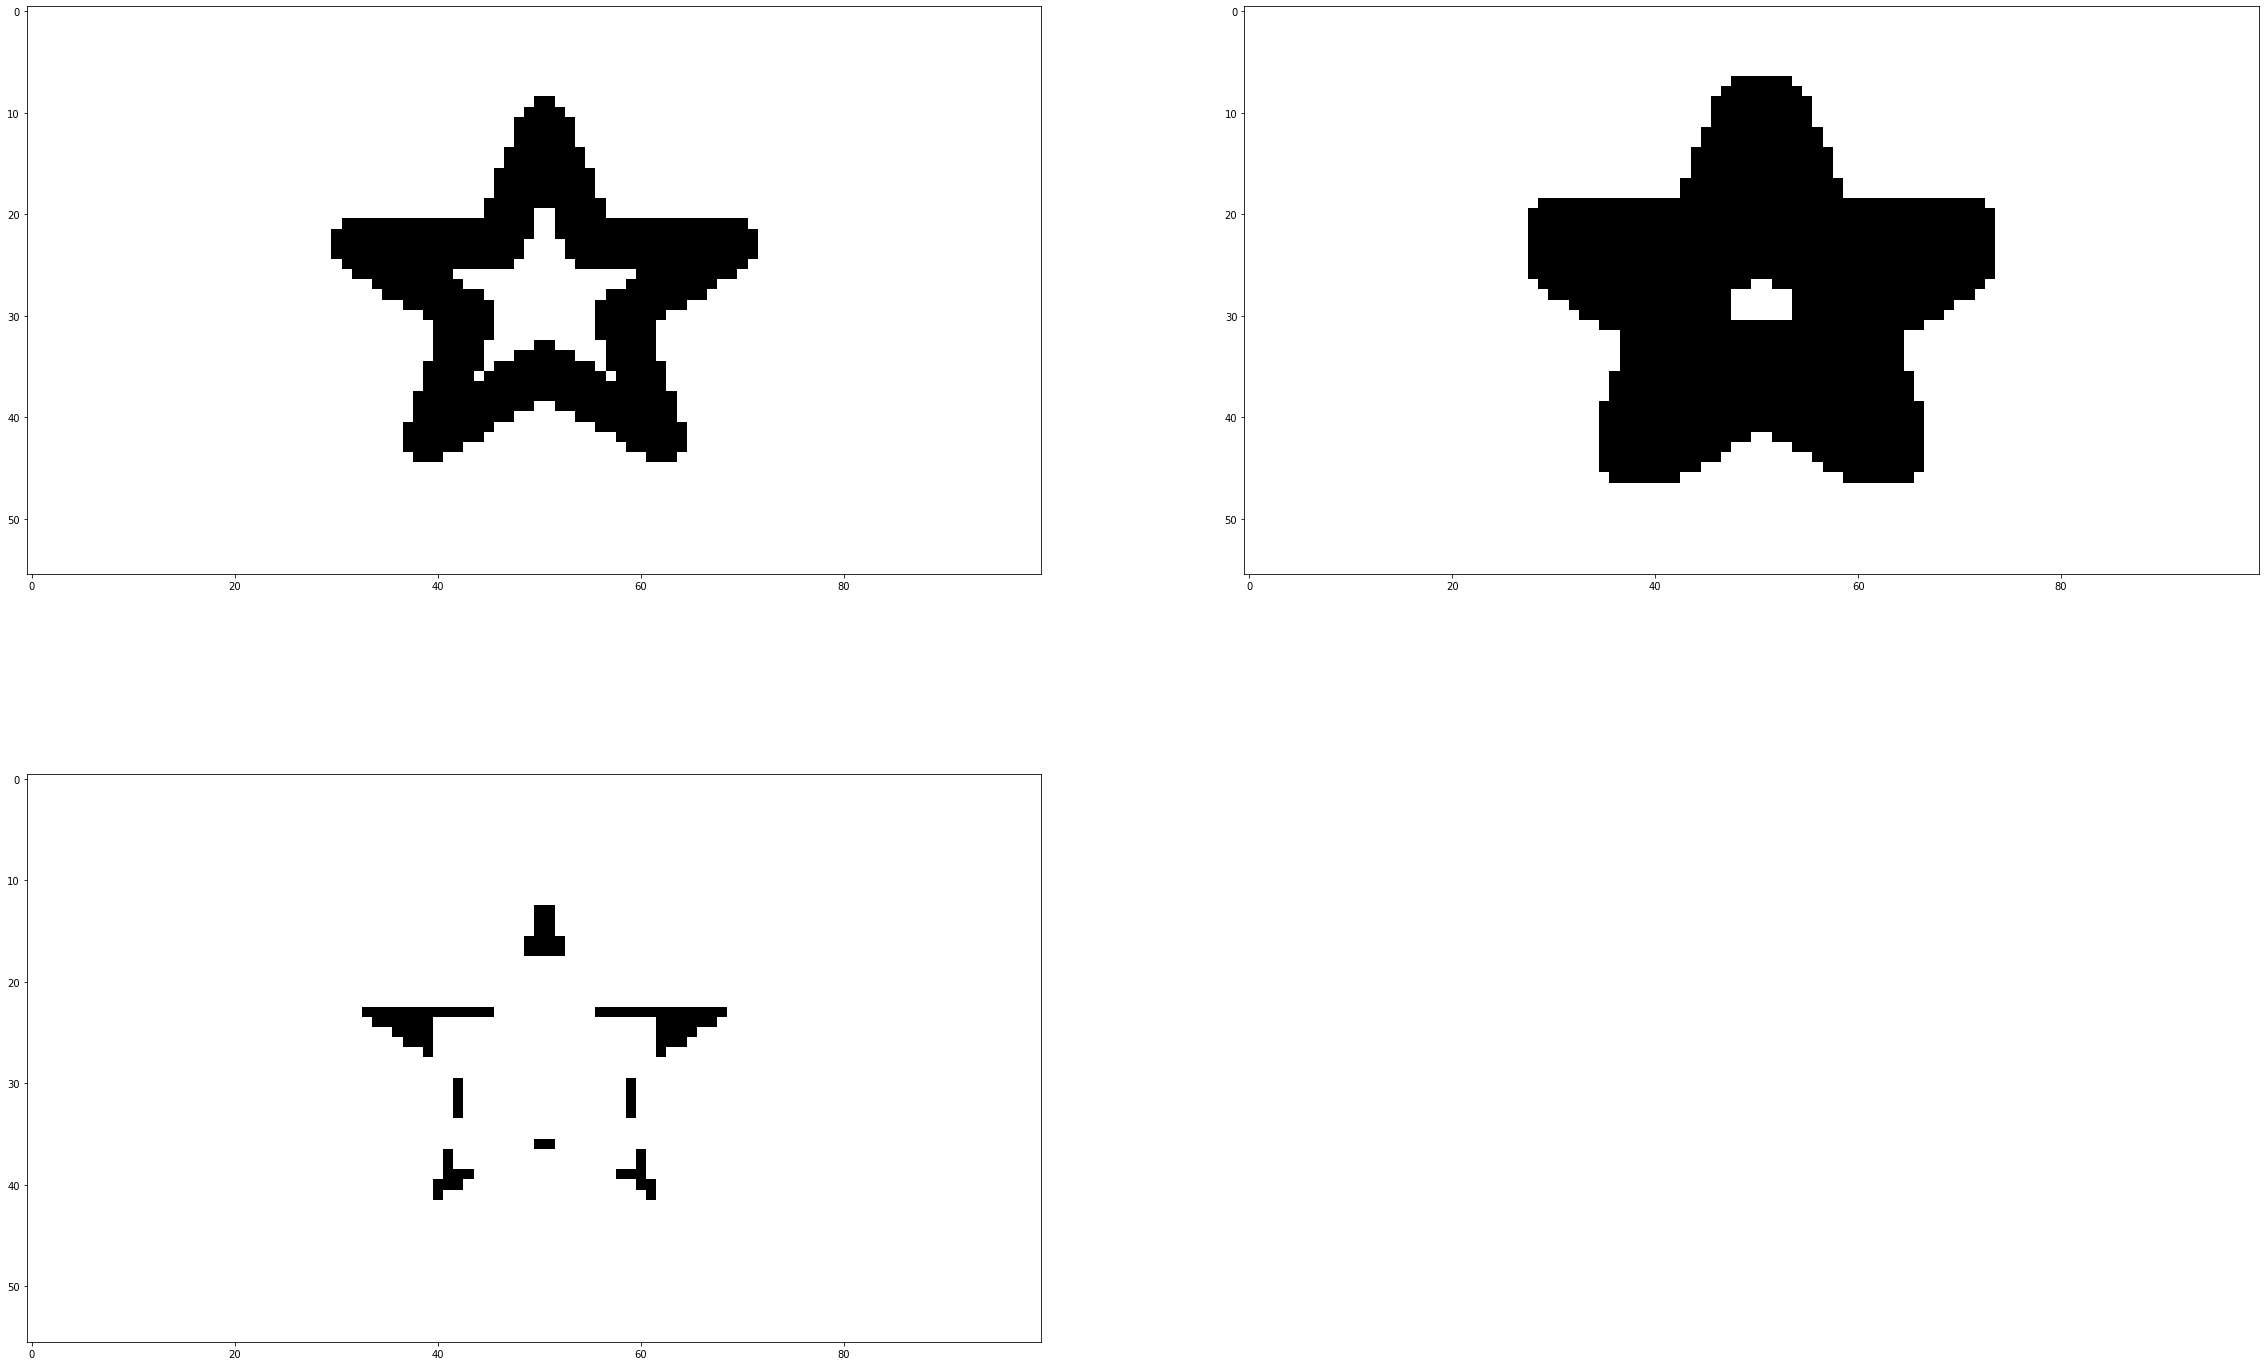

In [46]:
kernel = np.ones((5,5), np.uint8)
img_erosion = cv2.erode(img, kernel, iterations=1) 
img_dilation = cv2.dilate(img, kernel, iterations=1) 
plt.figure(figsize=(40,40))
plt.subplot(3,2,1)
plt.imshow(img,cmap="gray")
plt.subplot(3,2,2)
plt.imshow(img_erosion,cmap="gray")
plt.subplot(3,2,3)
plt.imshow(img_dilation,cmap="gray")